In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define input

In [2]:
# Define input time series x
np.random.seed(0)
x = np.sin(np.linspace(0, 3 * np.pi, 100)) + 0.1 * np.random.randn(100)

# Define a group of 3 random kernels w_i, each with length = 9
kernel_size = 9
num_kernels = 3
kernels = [np.random.randn(kernel_size) for _ in range(num_kernels)]
# Normalize kernels
kernels = [(k - np.mean(k)) / np.sum(np.abs(k)) for k in kernels]

# Perform convolution with padding to preserve length
responses = np.array([
    np.convolve(x, k[::-1], mode='same')  # reverse kernel for dot product form
    for k in kernels
])

# Find the kernel with the maximum response at each timepoint
winning_kernels = np.argmax(responses, axis=0)

Time series $x$

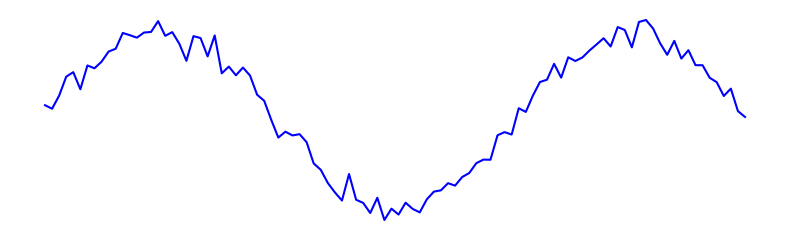

In [3]:
plt.figure(figsize=(8, 2.5))
plt.plot(x, color='blue')
# plt.title("Input Time Series $x$")
# plt.xlabel("Time")
# plt.ylabel("Value")
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()


Kernels $w^i$

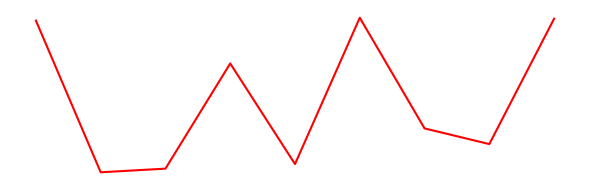

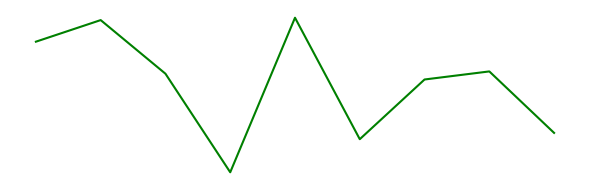

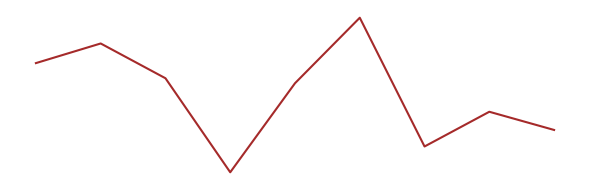

In [4]:
colors = ['red', 'green', 'brown']

for i, (k, color) in enumerate(zip(kernels, colors)):
    plt.figure(figsize=(6, 2))
    plt.plot(k, label=f'Kernel $w_{{{i}}}$', color=color)
    # plt.title(f'Kernel $w_{{{i}}}$')
    # plt.xlabel("Time (within kernel)")
    # plt.ylabel("Value")
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


Results of $x * w^i$

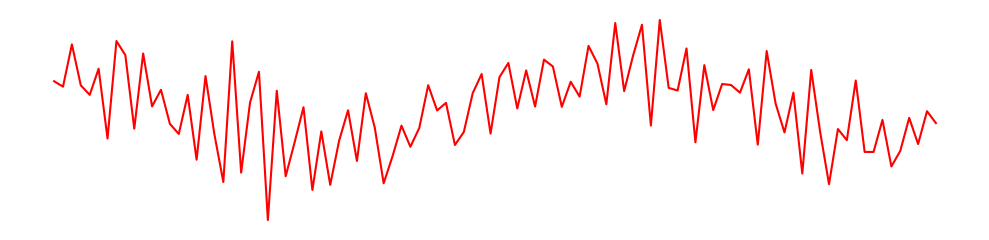

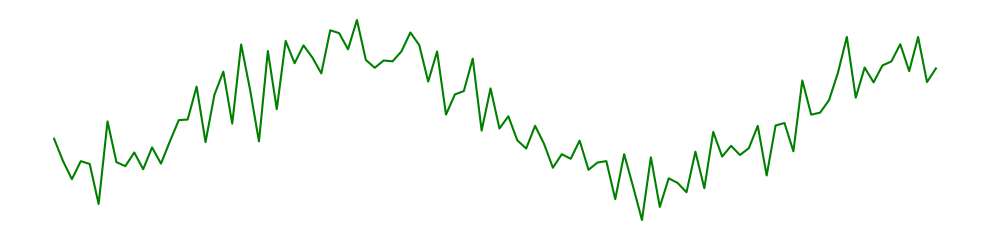

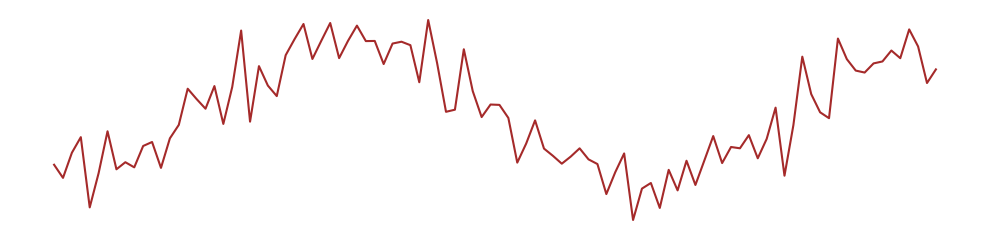

In [5]:
for i in range(len(kernels)):
    plt.figure(figsize=(10, 2.5))
    plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i])
    # plt.title(f"Convolution Response: $x \\ast w_{i}$")
    # plt.xlabel("Time")
    # plt.ylabel("Response")
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


Overlap the above results

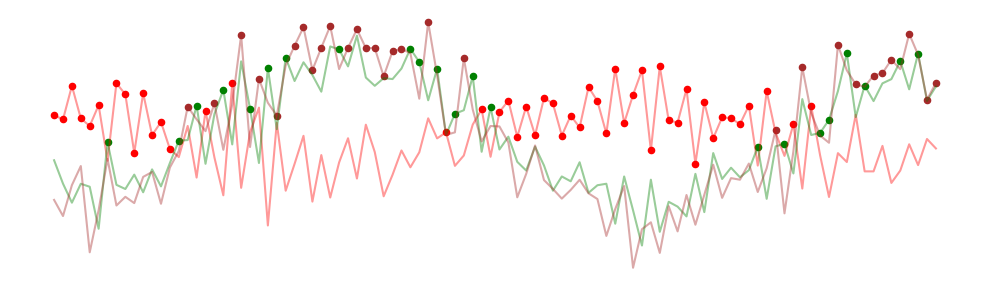

In [6]:
plt.figure(figsize=(10, 3))

for i in range(len(kernels)):
    plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i], alpha=0.4)

# Highlight winning points
for i in range(len(kernels)):
    mask = (winning_kernels == i)
    plt.scatter(np.where(mask), responses[i, mask], s=20, color=colors[i])

# plt.title("Responses and Winning Kernel at Each Timepoint")
# plt.xlabel("Time")
# plt.ylabel("Response")
# plt.legend()
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()


argmax

In [7]:
# Convert to plain Python list
winning_kernel_list = (winning_kernels + 1).tolist() # Plus one so the first kernel starts at 1

print("Winning kernel indices per timepoint:")
print(' '.join(map(str, winning_kernel_list)))


Winning kernel indices per timepoint:
1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 3 2 1 3 2 1 3 2 3 2 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 3 2 1 2 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 2 1 3 1 2 2 3 2 3 2 3 3 3 2 3 2 3 3


counts

In [8]:
# winning_kernels is a 1D array where each value is the index of the winning kernel at that timepoint
num_kernels = len(kernels)

# Count how many times each kernel wins
winning_counts = np.bincount(winning_kernels, minlength=num_kernels)

# Print results
for i, count in enumerate(winning_counts):
    print(f"Kernel w_{i} wins at {count} timepoints")


Kernel w_0 wins at 49 timepoints
Kernel w_1 wins at 22 timepoints
Kernel w_2 wins at 29 timepoints


In [9]:
import datetime
print(f"This Notebook last end-to-end runs on: {datetime.datetime.now()}\n")
###
###
###

This Notebook last end-to-end runs on: 2025-07-15 13:47:40.621645

